<h1><strong>Random Forest Regressor Ensemble Model Development</strong></h1>

In [102]:
import pandas as pd
import os
import yfinance as yf
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [103]:
save_local = True
ticker = "META"
start_date = "2010-01-01"
end_date = "2020-01-01"
local_file = f'data/{ticker}_data.csv'

directory = os.path.dirname(local_file)

if save_local and not os.path.exists(directory):
    os.makedirs(directory)
if save_local and local_file and os.path.exists(local_file):
    df = pd.read_csv(local_file, index_col='Date', parse_dates=True)
else:
    df = yf.download(ticker, start=start_date, end=end_date)
    if save_local:
        df.to_csv(local_file)

df.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.115242,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.927845,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.906942,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.903940,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.930847,50237200


In [104]:
X = df.drop(['Adj_Close'], axis=1)
Y = df['Adj_Close']

In [105]:
X.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200


In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

In [85]:
random_forest = RandomForestRegressor()

In [86]:
random_forest.fit(X_train, Y_train)

RandomForestRegressor()

In [87]:
y_prediction =  random_forest.predict(X_test)

In [88]:
mean_absolute_error(y_prediction, Y_test)

0.1386472762624428

In [89]:
mean_squared_error(y_prediction, Y_test)

0.060942847750926864

In [90]:
r2_score(y_prediction, Y_test)

0.999980467068214

<strong>Hyper Parameter Tuning (Parameter Grid)</strong>

In [91]:
param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [10, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4] 
}

In [92]:
from sklearn.model_selection import GridSearchCV

In [93]:
cross_validation = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs= -1)

In [94]:
cross_validation.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [110]:
y_prediction_crossvalidation =  cross_validation.predict(X_test)

In [111]:
mean_absolute_error(y_prediction_crossvalidation, Y_test)

0.13261042873064743

In [112]:
mean_squared_error(y_prediction_crossvalidation, Y_test)

0.05222142795700018

In [113]:
r2_score(y_prediction_crossvalidation, Y_test)

0.9999832639529254

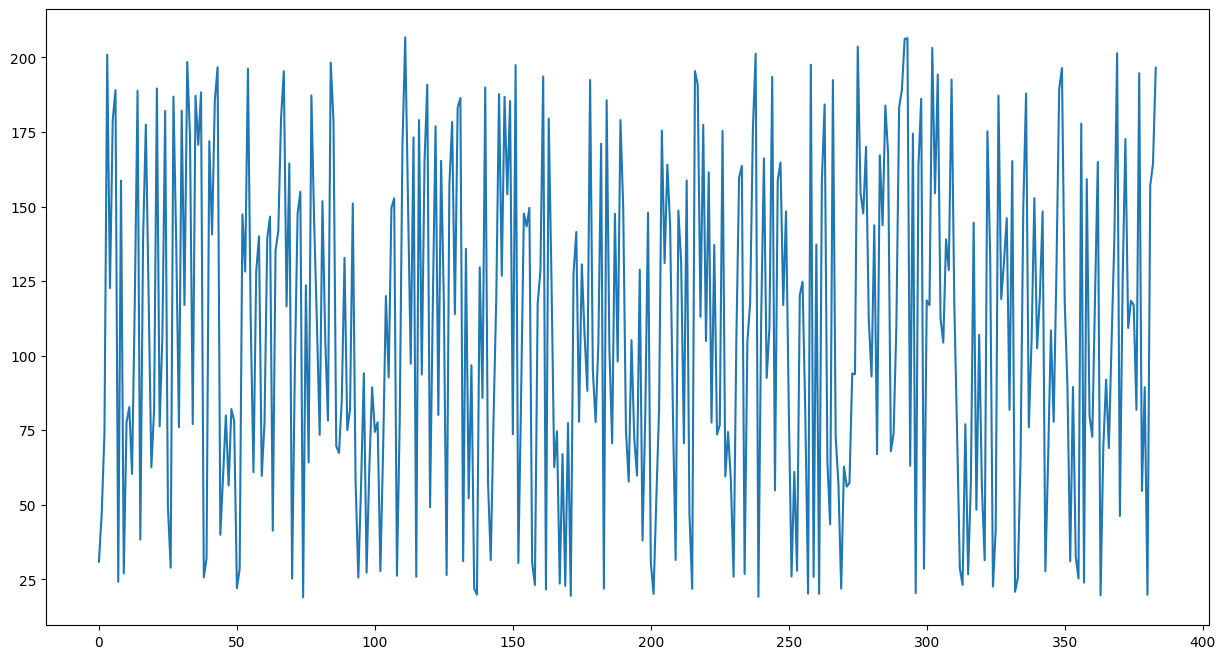

In [127]:
plt.figure(figsize=(15, 8))
plt.plot(y_prediction_crossvalidation)